# model9 Global Gru Convolution (id: 2vr5)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
pickle_path = r'C:\Users\jv97\Desktop\github\Neutrino-Machine-Learning\checkpoints\oscNext_angle_m9_2vr5'

df = pd.read_pickle(os.path.join(pickle_path,'test_predictions.pkl'))

In [3]:
df.head()

,event_no,azimuth,zenith,pid,azimuth_retro,zenith_retro,azimuth_sigma,zenith_sigma,azimuth_pred,zenith_pred,azimuth_pred_sigma,zenith_pred_sigma
0,3112.0,2.193358,2.169334,14.0,1.426413,2.162529,0.446090,0.238478,2.211308,1.732597,-1.292671,-2.266392
1,8086.0,1.254911,2.925419,14.0,2.639656,3.008163,2.140337,0.134599,3.349339,2.729870,-1.317948,-4.621393
2,17266.0,5.754909,1.374746,14.0,3.003944,1.131962,0.480126,0.173851,2.791810,1.295266,-0.000520,-2.859205
3,20603.0,3.963934,1.774199,14.0,5.248772,2.074494,0.509195,0.393423,-1.028962,2.244847,-0.968555,-2.776270
4,44948.0,1.708282,1.048520,14.0,1.863373,1.273248,0.173783,0.134680,3.052326,1.968615,-0.697382,-2.108546


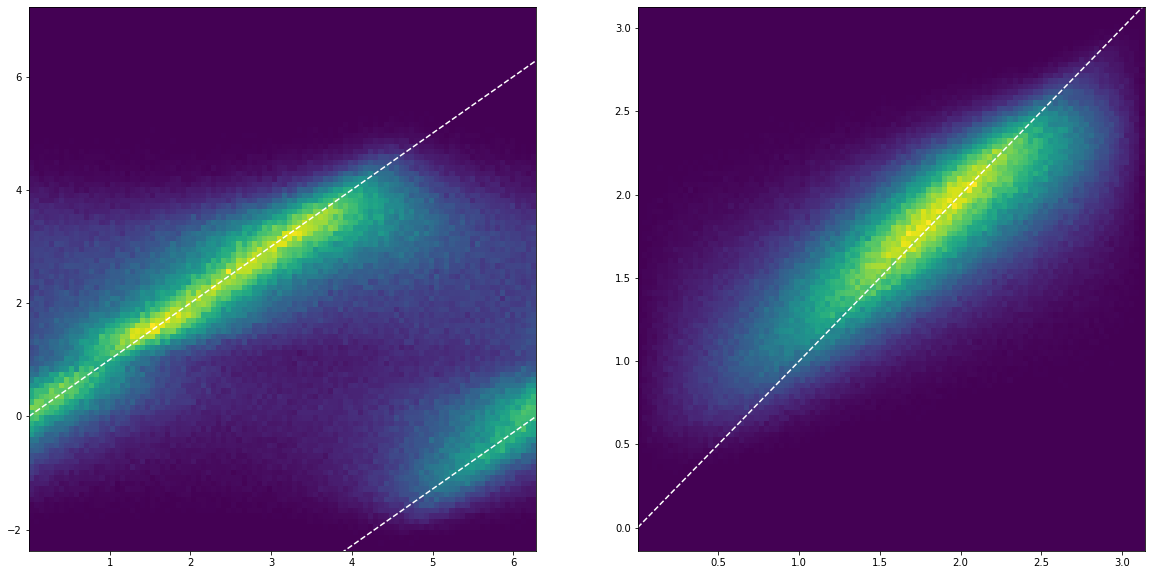

In [4]:
fig, ax = plt.subplots(figsize=(20,10),ncols=2)
ax[0].hist2d(df.azimuth,df.azimuth_pred,bins=100);
ax[1].hist2d(df.zenith,df.zenith_pred,bins=100);

ax[0].plot([0,2*np.pi],[0,2*np.pi],'w--')
ax[0].plot([0,2*np.pi],[-2*np.pi,0],'w--')
ax[1].plot([0,np.pi],[0,np.pi],'w--')

In [5]:
az_res = np.arccos(np.cos(df.azimuth_pred)*np.cos(df.azimuth) + np.sin(df.azimuth_pred)*np.sin(df.azimuth))*180/np.pi
ze_res = np.arccos(np.cos(df.zenith_pred)*np.cos(df.zenith) + np.sin(df.zenith_pred)*np.sin(df.zenith))*180/np.pi
#The above is perhaps not the right way for zenith but works as long as zenith pred is between 0 and pi

from scipy.special import iv
az_sigma = np.sqrt(1 - iv(1,np.square(df.azimuth_pred_sigma))/iv(0,np.square(df.azimuth_pred_sigma)))*180/np.pi
ze_sigma = np.sqrt(1 - iv(1,np.square(df.zenith_pred_sigma))/iv(0,np.square(df.zenith_pred_sigma)))*180/np.pi

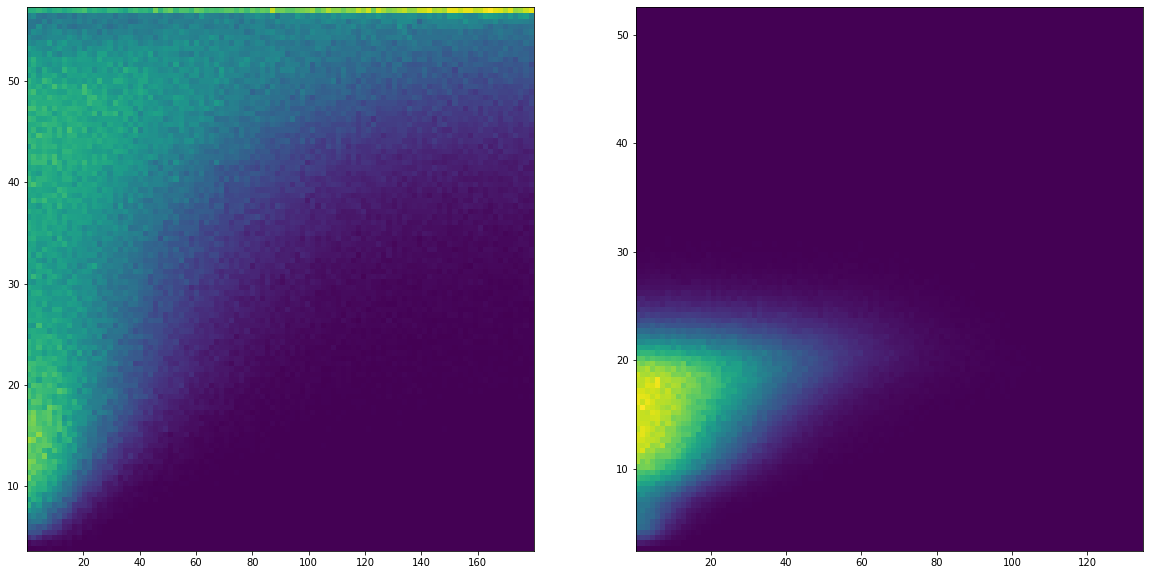

In [6]:
fig, ax = plt.subplots(figsize=(20,10),ncols=2)
ax[0].hist2d(az_res,az_sigma,bins=100);
ax[1].hist2d(ze_res,ze_sigma,bins=100);

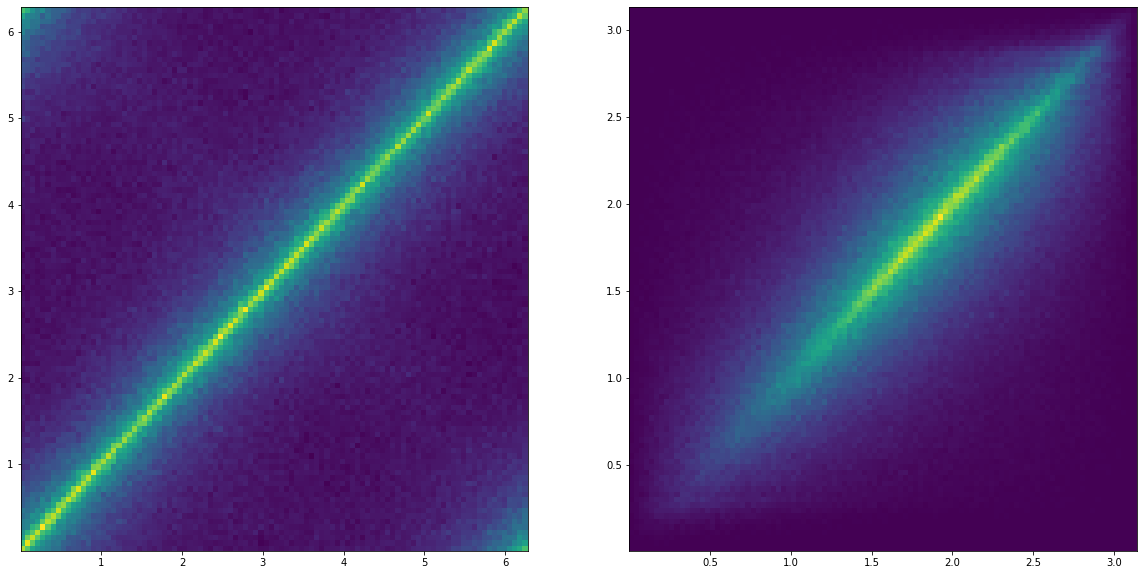

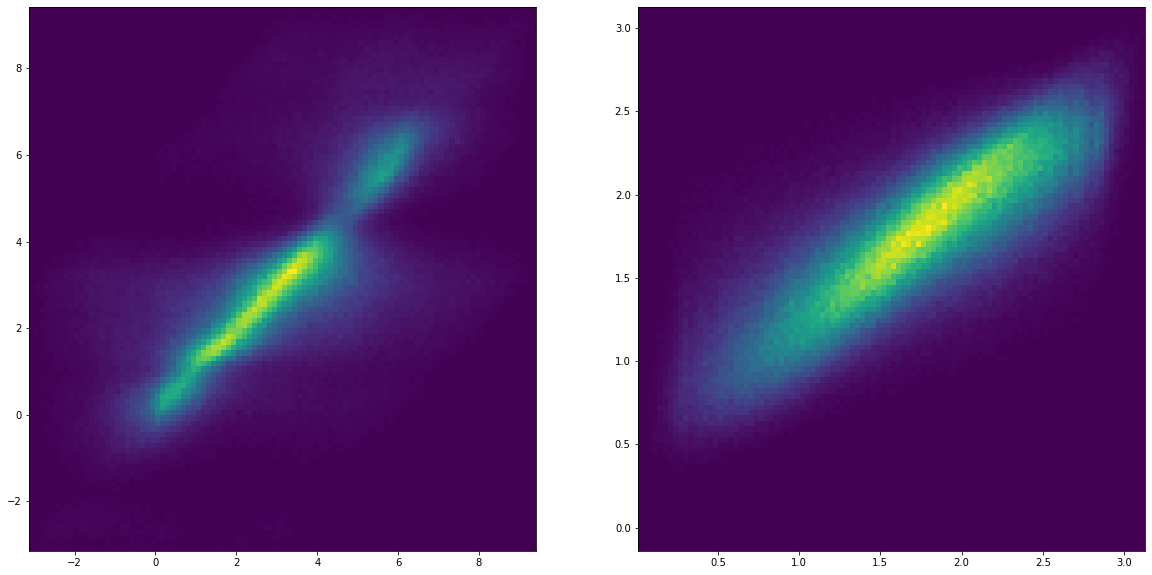

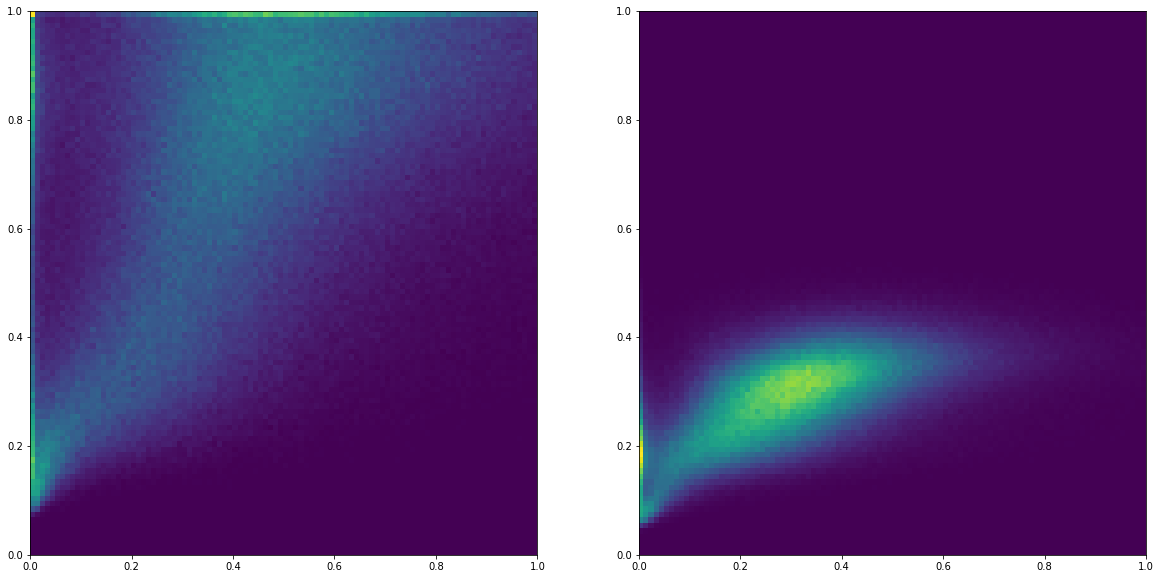

In [14]:
T_az_pred = df.azimuth_pred.copy()
T_az_pred[np.abs(T_az_pred - df.azimuth) > np.pi] = T_az_pred[np.abs(T_az_pred - df.azimuth) > np.pi] - np.sign(T_az_pred - df.azimuth)*2*np.pi

T_az_retro = df.azimuth_retro.copy()
T_az_retro[np.abs(T_az_retro - df.azimuth) > np.pi] = T_az_retro[np.abs(T_az_retro - df.azimuth) > np.pi] - np.sign(T_az_retro - df.azimuth)*2*np.pi

fig, ax = plt.subplots(figsize=(20,10),ncols=2)
ax[0].hist2d(df.azimuth,df.azimuth_retro,bins=100);
ax[1].hist2d(df.zenith,df.zenith_retro,bins=100);

fig, ax = plt.subplots(figsize=(20,10),ncols=2)
ax[0].hist2d(T_az_retro,T_az_pred,bins=100);
ax[1].hist2d(df.zenith_retro,df.zenith_pred,bins=100);

fig, ax = plt.subplots(figsize=(20,10),ncols=2)
ax[0].hist2d(df.azimuth_sigma,az_sigma*np.pi/180,bins=100,range=((0,1),(0,1)));
ax[1].hist2d(df.zenith_sigma,ze_sigma*np.pi/180,bins=100,range=((0,1),(0,1)));

In [8]:
df_data = pd.read_pickle(os.path.join(pickle_path,'test_data_predictions.pkl'))
df_data.head()

,event_no,azimuth_retro,zenith_retro,azimuth_sigma,zenith_sigma,azimuth_pred,zenith_pred,azimuth_pred_sigma,zenith_pred_sigma
0,0.0,1.947995,1.447643,0.011919,0.006036,2.097930,1.554986,-7.287058,-8.975826
1,1.0,1.429471,0.964943,0.313485,0.461077,1.212115,1.022235,-0.896617,-2.218345
2,2.0,2.910558,0.779122,0.786920,0.352431,3.311777,1.598022,-1.387376,-2.446280
3,3.0,4.711105,1.321742,0.463091,0.317207,4.021784,1.779897,-0.627772,-2.152980
4,4.0,2.461376,1.561457,0.473049,0.526679,1.738041,1.736209,-0.974840,-2.288333


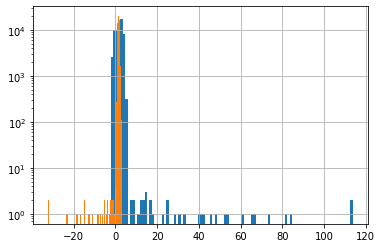

In [9]:
df_data.azimuth_pred.hist(bins=100);
plt.yscale('log')

df_data.zenith_pred.hist(bins=100);
plt.yscale('log')

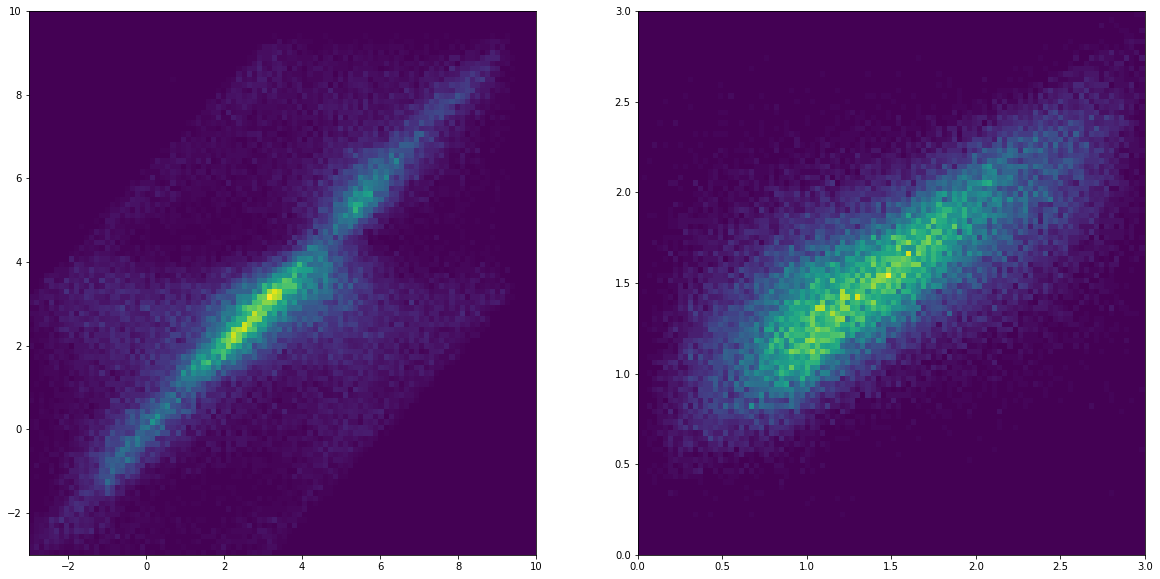

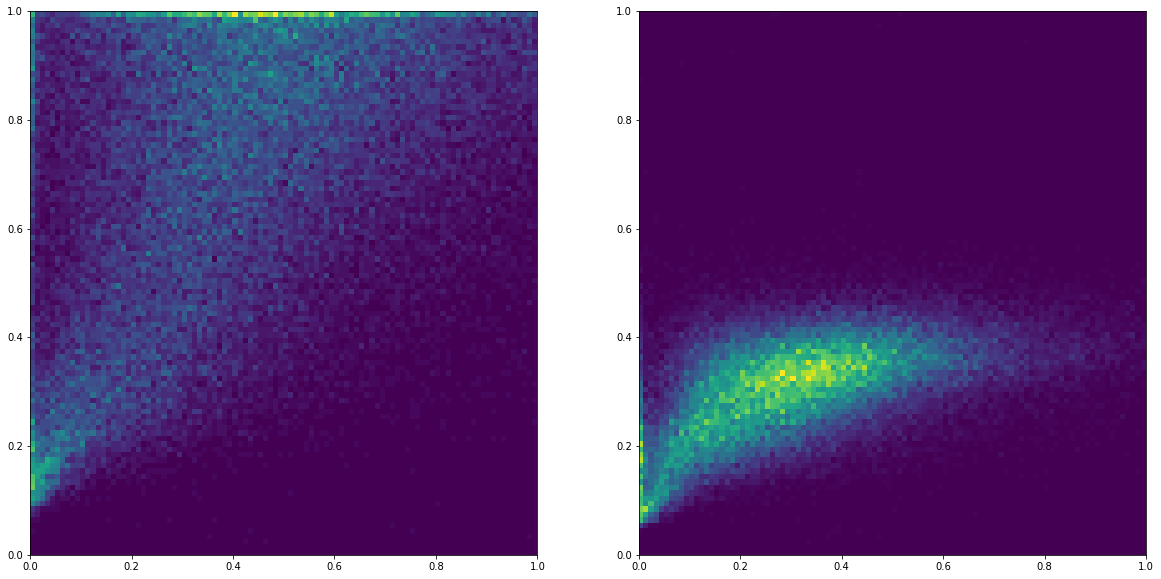

In [15]:
T_az_pred = df_data.azimuth_pred.copy()
T_az_pred[np.abs(T_az_pred - df.azimuth) > np.pi] = T_az_pred[np.abs(T_az_pred - df.azimuth) > np.pi] - np.sign(T_az_pred - df.azimuth)*2*np.pi

T_az_retro = df_data.azimuth_retro.copy()
T_az_retro[np.abs(T_az_retro - df.azimuth) > np.pi] = T_az_retro[np.abs(T_az_retro - df.azimuth) > np.pi] - np.sign(T_az_retro - df.azimuth)*2*np.pi

az_sigma = np.sqrt(1 - iv(1,np.square(df_data.azimuth_pred_sigma))/iv(0,np.square(df_data.azimuth_pred_sigma)))*180/np.pi
ze_sigma = np.sqrt(1 - iv(1,np.square(df_data.zenith_pred_sigma))/iv(0,np.square(df_data.zenith_pred_sigma)))*180/np.pi

fig, ax = plt.subplots(figsize=(20,10),ncols=2)
ax[0].hist2d(T_az_retro,T_az_pred,bins=100,range=((-3,10),(-3,10)));
ax[1].hist2d(df_data.zenith_retro,df_data.zenith_pred,bins=100,range=((0,3),(0,3)));

fig, ax = plt.subplots(figsize=(20,10),ncols=2)
ax[0].hist2d(df_data.azimuth_sigma,az_sigma*np.pi/180,bins=100,range=((0,1),(0,1)));
ax[1].hist2d(df_data.zenith_sigma,ze_sigma*np.pi/180,bins=100,range=((0,1),(0,1)));

# model 9 2bkp MC predictions (id: 2bkp)

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import FunctionCollection as fc

In [3]:
pred_path = r"C:\Users\jv97\Desktop\github\Neutrino-Machine-Learning\predictions"
pred_filename = 'OscNext_Angle_m9_2bkp_1mio_MC_predictions.csv'

filepath = os.path.join(pred_path,pred_filename)

df = pd.read_csv(filepath)

In [5]:
df.head()

,Unnamed: 0,event_no,azimuth,zenith,pid,energy_log10,azimuth_retro,zenith_retro,azimuth_sigma,zenith_sigma,azimuth_pred,zenith_pred,pred_sigma
0,0,3716.0,4.897526,1.281272,14.0,1.655986,4.680817,1.035711,0.273752,0.224731,4.577322,1.298186,0.727446
1,1,13047.0,3.483675,0.739193,14.0,1.050779,0.359910,0.301674,-4.073008,0.250577,2.192815,0.052090,0.888021
2,2,19038.0,0.666502,1.940566,14.0,1.193470,0.873274,2.037826,0.171879,0.132933,0.982625,2.237202,0.402910
3,3,39648.0,1.759006,1.982751,-14.0,2.279663,1.759128,1.966377,0.000000,0.000000,1.526748,2.050307,0.242982
4,4,39684.0,1.693997,1.368704,14.0,2.305731,1.298085,1.457479,0.031107,0.013366,1.665961,1.357381,0.456790


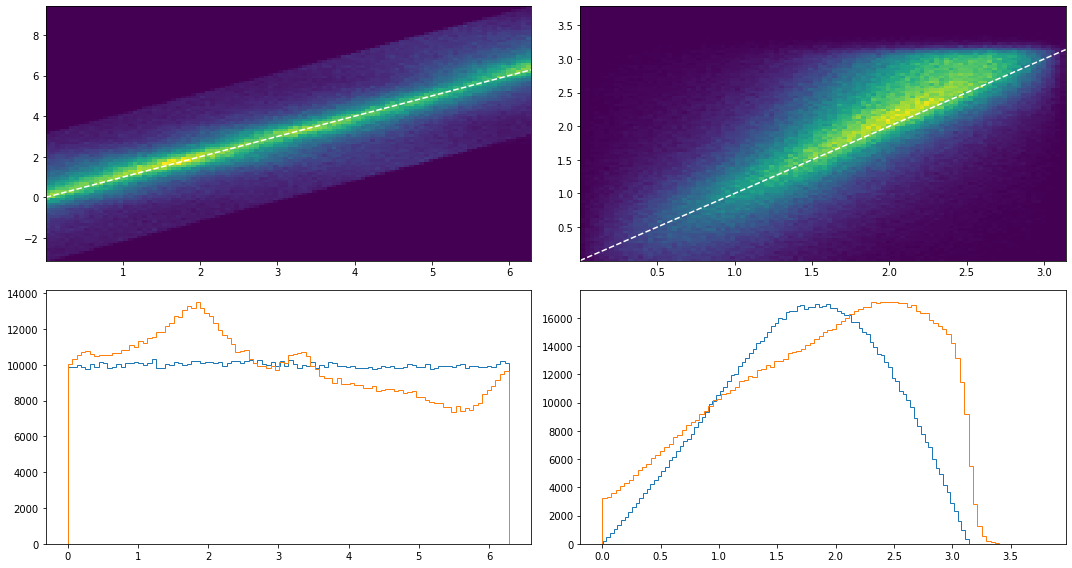

In [19]:
bins = 100

fig, ax = plt.subplots(figsize=(15,8),ncols=2, nrows=2)
ax = ax.flatten()

ax[0].hist2d(df.azimuth,df.azimuth_pred,bins=bins)
ax[0].plot([0,2*3.14],[0,2*3.14],'--w')
ax[1].hist2d(df.zenith,df.zenith_pred,bins=bins)
ax[1].plot([0,3.14],[0,3.14],'--w');

ax[2].hist(df.azimuth,bins=bins,histtype='step')
ax[2].hist((df.azimuth_pred + 2*3.14 )%(2*3.14), bins=bins,histtype='step')

ax[3].hist(df.zenith,bins=bins,histtype='step')
ax[3].hist(df.zenith_pred,bins=bins,histtype='step')

# ax[2].hist(df.pred_sigma,bins=bins)

fig.tight_layout()

In [20]:
def Omega(azp,zep,azt,zet):
    s1 = np.sin( zet + azt - azp )
    s2 = np.sin( zet - azt + azp )
    c1 = np.cos( zet - zep )
    c2 = np.cos( zet + zep )
    return np.arccos(0.5*np.abs(np.sin(zep))*( s1 + s2 ) + 0.5*(c1 + c2))

solidA = Omega(df.azimuth_pred, df.zenith_pred, df.azimuth, df.zenith)*180/np.pi
sigma = df.pred_sigma*180/np.pi

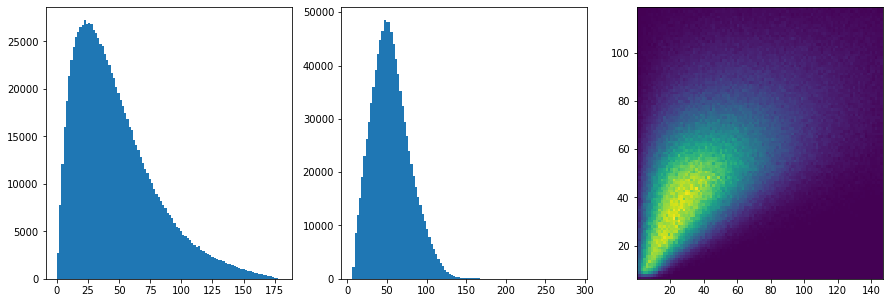

In [27]:
fig, ax = plt.subplots(figsize=(15,5),ncols=3)
ax[0].hist(solidA,bins=bins);
ax[1].hist(sigma,bins=bins);
# ax[2].hist(solidA/sigma,bins=bins);
ax[2].hist2d(solidA,sigma,bins=bins,range=(np.quantile(solidA,(0,0.99)),np.quantile(sigma,(0,0.99))));

In [34]:
solidA_retro = Omega(df.azimuth_retro, df.zenith_retro, df.azimuth, df.zenith)*180/np.pi

[8.41628713e-05 3.98391474e-01 7.96698784e-01 1.19500610e+00
 1.59331341e+00 1.99162072e+00 2.38992803e+00 2.78823534e+00
 3.18654265e+00 3.58484996e+00 3.98315727e+00] 8.416287128459917e-05 3.98315727079662


C:\Users\jv97\Desktop\github\Neutrino-Machine-Learning\FunctionCollection.py:205: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\jv97\Desktop\github\Neutrino-Machine-Learning\FunctionCollection.py:215: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


[8.41628713e-05 3.98391474e-01 7.96698784e-01 1.19500610e+00
 1.59331341e+00 1.99162072e+00 2.38992803e+00 2.78823534e+00
 3.18654265e+00 3.58484996e+00 3.98315727e+00] 8.416287128459917e-05 3.98315727079662


C:\Users\jv97\Desktop\github\Neutrino-Machine-Learning\FunctionCollection.py:205: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\jv97\Desktop\github\Neutrino-Machine-Learning\FunctionCollection.py:215: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


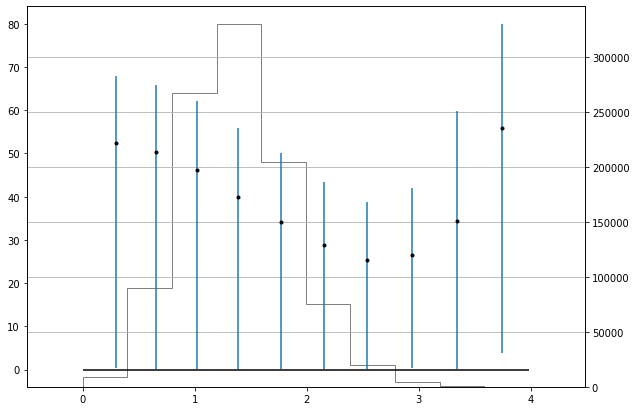

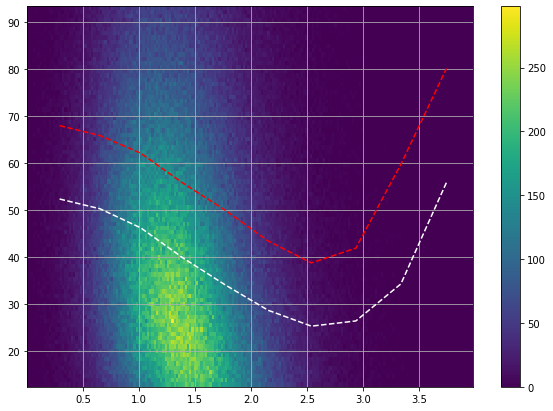

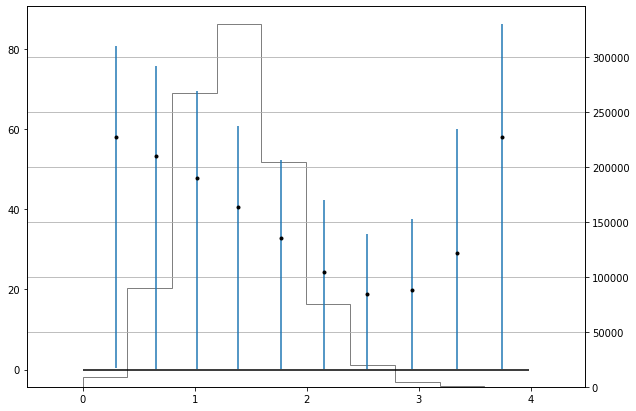

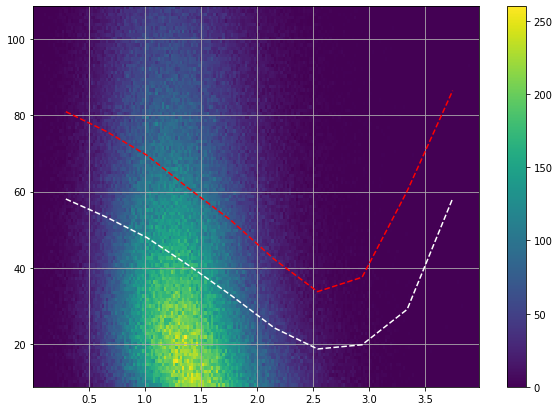

In [35]:
qs = fc.performance_plot(solidA.to_numpy(),df.energy_log10.to_numpy(),zero_bounded=True)
qs_retro = fc.performance_plot(solidA_retro.to_numpy(),df.energy_log10.to_numpy(),zero_bounded=True)

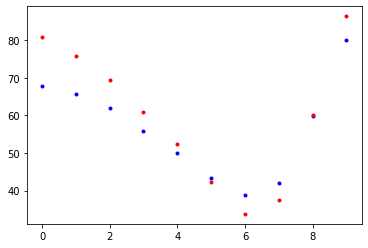

In [41]:
fig, ax = plt.subplots()
ax.plot(qs[:,2],'b.')
ax.plot(qs_retro[:,2],'r.')

# Model 21 global GRU Conv (id: 2jj9)

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import FunctionCollection as fc
%matplotlib notebook

In [2]:
df = pd.read_csv('predictions/OscNext_ZeE_m21_2jj9_test_predictions.csv')

In [4]:
df.head()

,Unnamed: 0,event_no,azimuth,zenith,energy_log10,pid,osc_weight,elasticity,energy_log10_pred,zenith_pred
0,0,13188815.0,5.965024,0.951963,2.339276,13.0,0.000077,-1.0,1.512953,1.210774
1,1,13188840.0,0.055570,0.956157,2.291836,13.0,0.000094,-1.0,1.876401,0.943771
2,2,13188844.0,4.418117,1.123479,2.356631,13.0,0.000067,-1.0,1.791444,0.946157
3,3,13188911.0,0.258589,1.010691,2.277840,13.0,0.000069,-1.0,1.429615,1.381124
4,4,13189105.0,6.016189,1.037441,2.394777,13.0,0.000082,-1.0,1.372021,1.206379


<IPython.core.display.Javascript object>


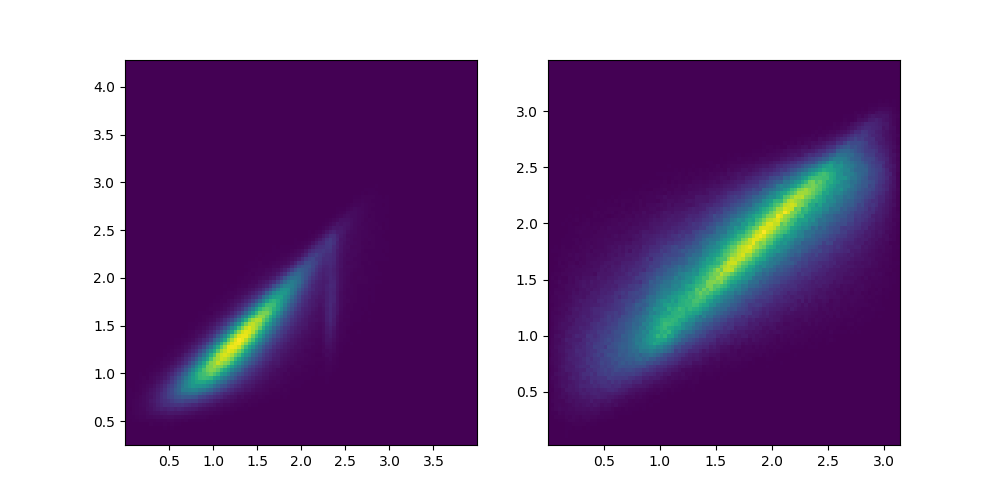

In [27]:
fig, ax = plt.subplots(figsize=(10,5),ncols=2)
ax[0].hist2d(df.energy_log10,df.energy_log10_pred,bins=100)
ax[1].hist2d(df.zenith,df.zenith_pred,bins=100);

<IPython.core.display.Javascript object>


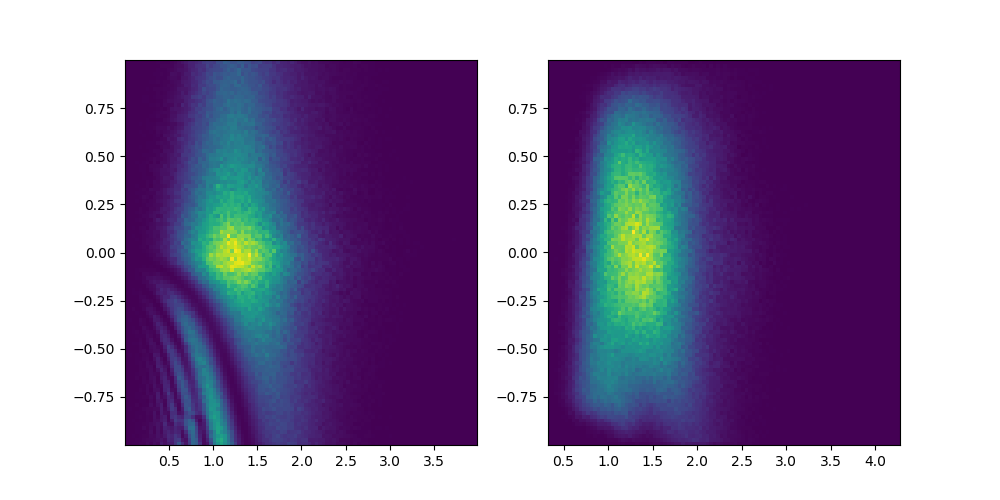

In [28]:
numu = df[df.pid.abs()==14]

fig, ax = plt.subplots(figsize=(10,5),ncols=2)
ax[0].hist2d(numu.energy_log10,np.cos(numu.zenith),bins=100,weights=numu.osc_weight);
ax[1].hist2d(numu.energy_log10_pred,np.cos(numu.zenith_pred),bins=100,weights=numu.osc_weight);

[5.58153521e-05 3.99767491e-01 7.99479166e-01 1.19919084e+00
 1.59890252e+00 1.99861419e+00 2.39832587e+00 2.79803754e+00
 3.19774922e+00 3.59746089e+00 3.99717257e+00] 5.581535210440865e-05 3.9971725695327347


<IPython.core.display.Javascript object>


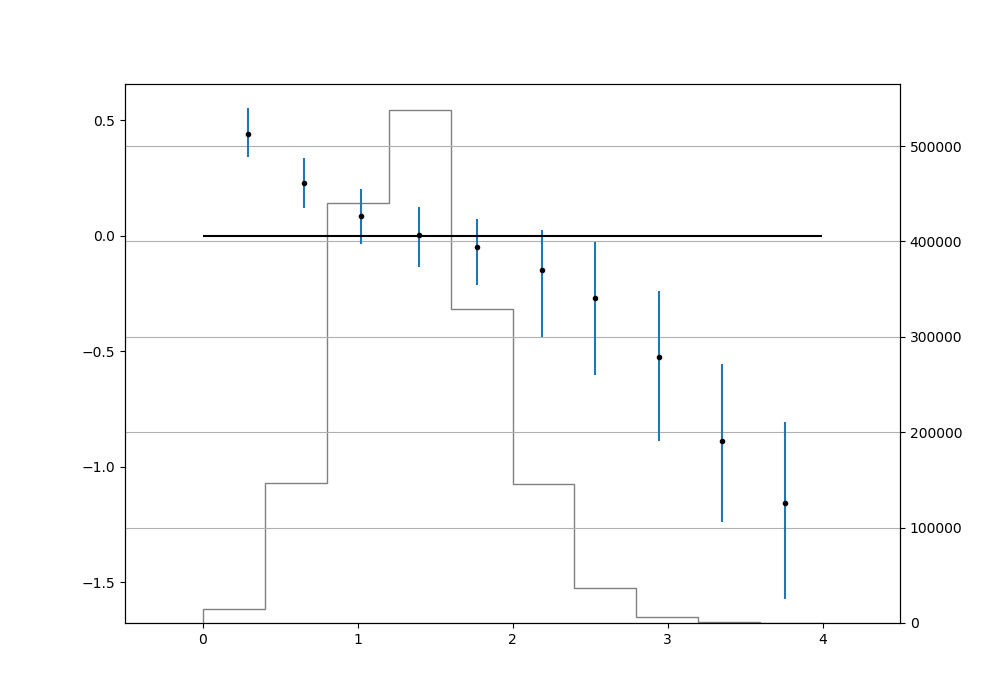

<IPython.core.display.Javascript object>


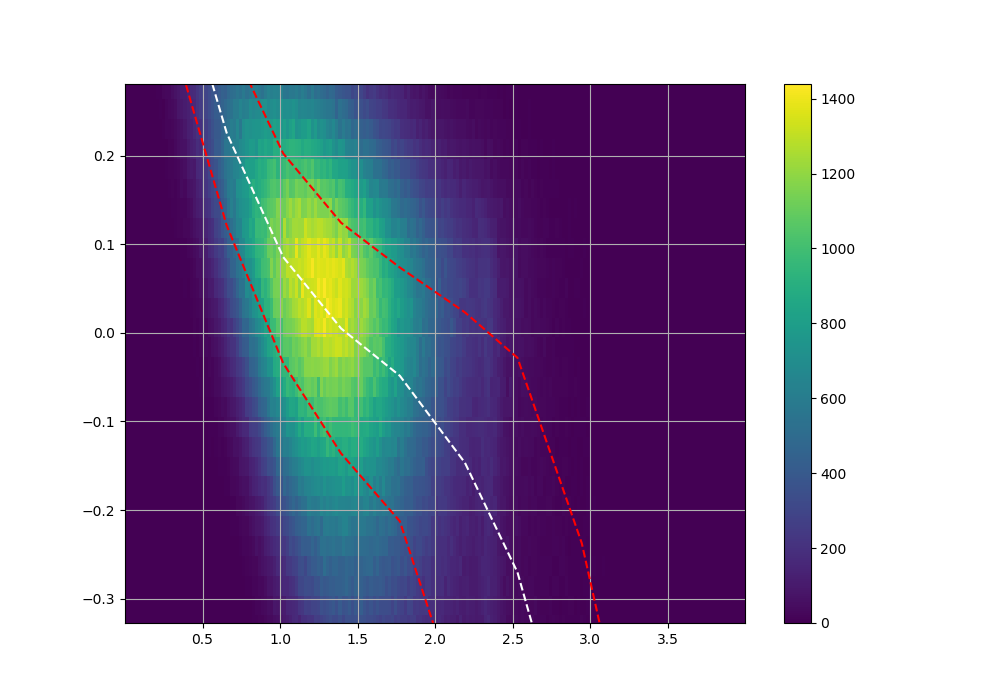

In [31]:
qs = fc.performance_plot((df.energy_log10_pred - df.energy_log10).to_numpy(),df.energy_log10.to_numpy(),zero_bounded=False)

[5.58153521e-05 3.99767491e-01 7.99479166e-01 1.19919084e+00
 1.59890252e+00 1.99861419e+00 2.39832587e+00 2.79803754e+00
 3.19774922e+00 3.59746089e+00 3.99717257e+00] 5.581535210440865e-05 3.9971725695327347


<IPython.core.display.Javascript object>


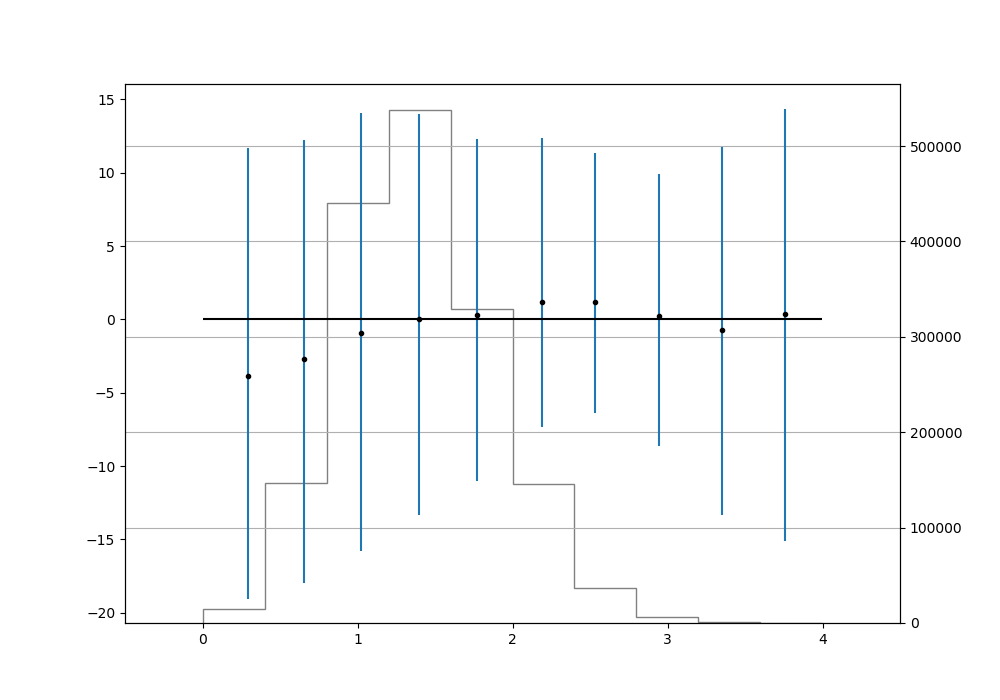

<IPython.core.display.Javascript object>


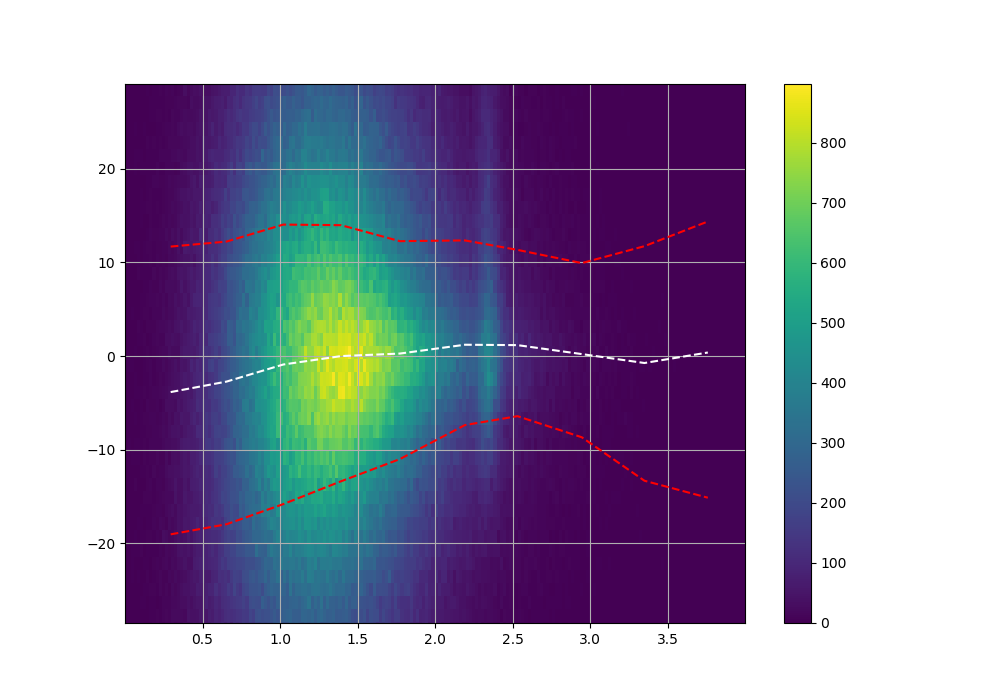

In [33]:
qs_ze = fc.performance_plot((df.zenith_pred - df.zenith).to_numpy()*180/np.pi,df.energy_log10.to_numpy(),zero_bounded=False)

In [38]:
# df[['event_no','energy_log10_pred','zenith_pred']].to_csv('jonasv@hep04.hpc.ku.dk:/groups/hep/johannbs/common_predictions/jonas_pred.csv')